# Aims: Try to find who has higher survival rate of all the people

In [1]:
# Set initial settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan as NA
import seaborn as sns

In [2]:
data = pd.read_csv("titanic_data.csv", engine = 'python')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# The total death rate and death rate by sex analysis
### Outcome:  More people died in accident than the ones survived, the female has a lower death rate and higher survival rate than man.
### Conclusion: Female has more chance to survive in the accident.

In [4]:
data = data.drop('Cabin', axis = 1) # too much missing data in cabin
survived = pd.DataFrame(data.Survived.value_counts()) # Count number of survived people

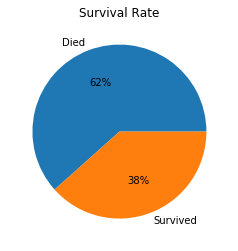

In [5]:
#  Using pie graph to illustrate
labelsl = 'Died','Survived'
plt.axes(aspect=1)
plt.pie(survived,labels = labelsl, autopct='%.0f%%')
plt.title('Survival Rate')
plt.show()

In [6]:
# Group people by survived or not
survived_df = data.groupby('Survived')
sex_df = survived_df.Sex.value_counts()

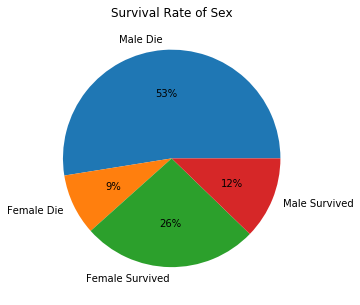

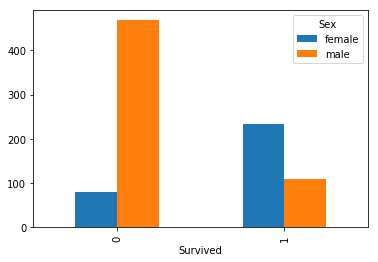

In [7]:
# Age analysis
# Ratio of male and female die or survived in the accident
plt.figure(figsize = (12, 5))
plt.subplot(121)
label = 'Male Die','Female Die','Female Survived','Male Survived'
plt.axes(aspect = 1)
plt.pie(sex_df, labels = label, autopct = '%.0f%%')
plt.title('Survival Rate of Sex')
sex_df.unstack().plot(kind = 'bar')
plt.show()

# Pclass analysis
### Outcome: The percentage of people who survived in Pclass 1 are higher than people from Pclass 2 and 3, so does the people from Pclass 2 .
### Hypothesis : People from Pclass 1 have the highest survival rate, the ones in Pclass 3 have the lowest, which indicates people who have more money could have better chance to survive in one sense, they are in the top of the boat which is convenient to escape, or it could be they are more resourseful when escaping.

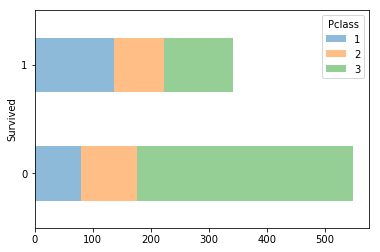

In [8]:
# Pclass analysis
# Survival comparison of people form different classes
tmp =  survived_df.Pclass.value_counts()
a = tmp.unstack()
a.plot(kind = 'barh', stacked = True, alpha = 0.5)
plt.show()

# Sex & Pclass analysis
### Outcome: Survial rate decreases from Pclass 1 to Pclass 3, the female in all cases has a higher survival rate than the male.
### Hypothesis: the female has more chance to survive in all the following conditons than the male.

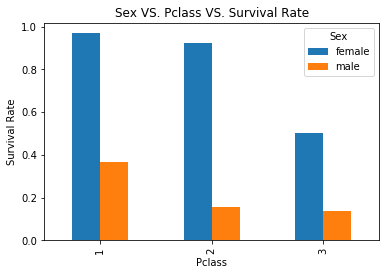

In [9]:
# Age & Pclass analysis
pclass_sex_df = data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Sex VS. Pclass VS. Survival Rate')
plt.ylabel('Survival Rate')
plt.show()

# Age analysis
### Outcome : Mean age of survived people are around 30, and audlts takes up majority of the total survival share.
### Hypothesis: Adults have a better chance to survive when enfronted with disaster.

In [10]:
# Age analysis
# Extract survived passengers for analysis
survived_only = data[data['Survived'] == 1]
died = data[data['Survived'] == 1]
first_clean = survived_only.drop('PassengerId', axis = 1)
second_clean = first_clean.dropna()

In [11]:
# Divide passengers according to their ages
teenager_sur = second_clean[second_clean['Age'] <=12].Age.count()
youth_sur = second_clean[(12 < second_clean['Age']) & ( second_clean['Age']<= 18 )].Age.count()
adult_sur = second_clean[(18 < second_clean['Age']) & ( second_clean['Age']<= 65 )].Age.count()
old_sur = second_clean[second_clean['Age'] > 65 ].Age.count()
age_df = pd.DataFrame([teenager_sur,youth_sur,adult_sur,old_sur], index = ['teenager','youth','adult','old'], columns = ['Number'])

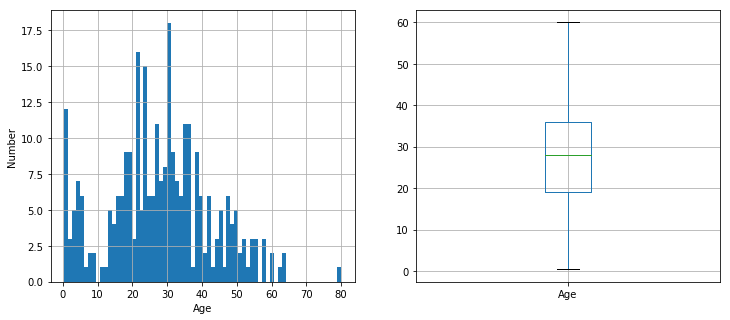

In [12]:
# Determine survival number of people and boxplot of survival trend
plt.figure(figsize = (12,5))
plt.subplot(121)
second_clean['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Number')
plt.subplot(122)
second_clean.boxplot(column = 'Age', showfliers = False)
plt.show()

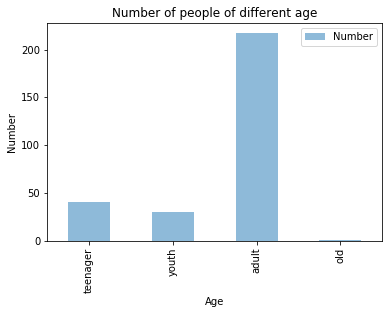

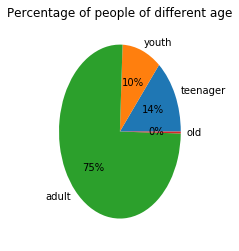

In [13]:
# Further analysis using percentage and bar plot
plt.figure(figsize = (10,5))
age_df.plot(kind = 'bar', align = 'center', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Number of people of different age')
plt.show()
plt.subplot(122)
label = 'teenager','youth','adult','old'
plt.pie(age_df,labels = label, autopct='%.0f%%')
plt.title('Percentage of people of different age')
plt.show()

# SibSp and Parch analysis

### Outcome: People who have siblings, parents or children tend to have higher survival rate than the other ones. 
### Hypothesis: People who are together with their family have higher survival rate than those who not.


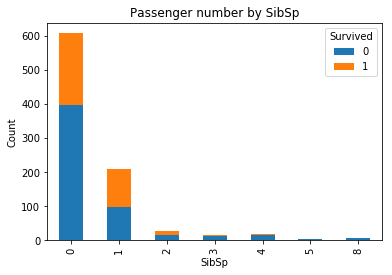

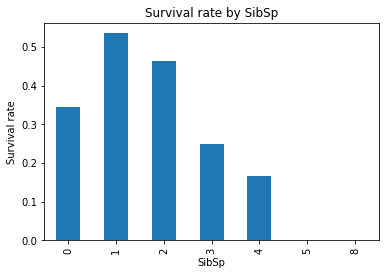

In [14]:
plt.figure(figsize = (12,5))
data.groupby(['SibSp', 'Survived'])['Survived'].count().unstack().plot(kind = 'bar', stacked=True)
plt.title('Passenger number by SibSp')
plt.ylabel('Count')
plt.show()
data.groupby(['SibSp'])['Survived'].mean().plot(kind='bar')
plt.title('Survival rate by SibSp')
plt.ylabel('Survival rate')
plt.show()

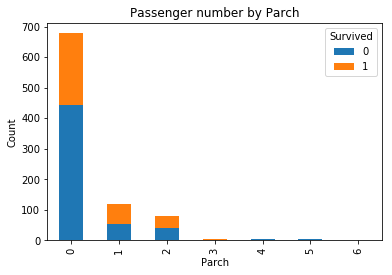

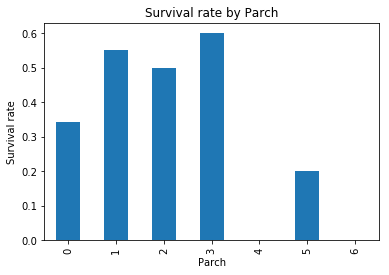

In [15]:
plt.figure(figsize = (12,5))
data.groupby(['Parch', 'Survived'])['Survived'].count().unstack().plot(kind = 'bar', stacked=True)
plt.title('Passenger number by Parch')
plt.ylabel('Count')
plt.show()
data.groupby(['Parch'])['Survived'].mean().plot(kind='bar')
plt.title('Survival rate by Parch')
plt.ylabel('Survival rate')
plt.show()

# Fare analysis
### Outcome:  People who have paid higher price for tickets have higher survival rate than others
### Hypothesis: It agrres with the Pclass analysis, for people who have better class of room would pay more.

In [16]:
fare_mode = data.Fare.dropna().mode()[0]
data['Fare'] = data['Fare'].fillna(fare_mode)

In [17]:
data['FareBins'] = pd.qcut(data['Fare'], 5)
fare_df = data[['FareBins', 'Survived']].groupby(['FareBins']).mean()
data[['FareBins', 'Survived']].groupby(['FareBins'], as_index = False).mean().sort_values(by = 'Survived')

,FareBins,Survived
1,"(7.854, 10.5]",0.201087
0,"(-0.001, 7.854]",0.217877
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


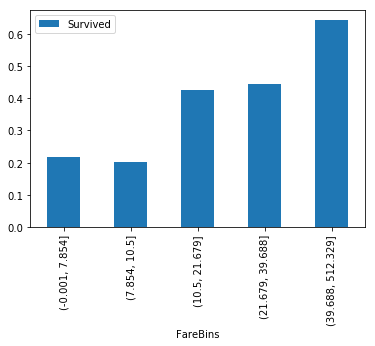

In [18]:
fare_df.plot(kind = 'bar')
plt.show()

## Analysis on the sample:
### The sample size is 891, and the total number is 2224, if the sample is randomly chosen, then the analysis is reliable according to central limit theorem. If not, it is not reliable.
### More information could be needed like nationnality, langugage speaking could also cause communication problem when evacuating. And people who can swim or not, could also useful data to look at.

# Conclusion:
## 1. Total death rate for the sample is 62%, which is rather high, and the death rate for female is lower than the one for male, the survival rate for female is larger than the rate for the male, which suggests that female has higher survival rate than male.
## 2. In the Pclass analysis, we  found that people from Pclass 1 has highest survival rate, the ones from the Pclass 3 has the lowest. And for Pclass and sex analysis, female still has a higher rate for survival.
## 3. In the age analysis, average age of the survival people is around 30, half of the survived people is between 19 to 36, and it is also clear demonstrated in the bar plot that aduts have highest survival rate of all.
## 4. In SibSp and Parch analysis, we found that people with families ( siblings, parents, children) have higher survival rate than others.
## 5. In fare analysis, when divided the fare range to five intervals, we found that, people in the highest interval who paid more, has higher survival rate than other, which agrees with Pclass analysis (also price related).